# scikit-learn의 기본 구조의 이해
데이터 분석 단계에 따라 scikit-learn의 다양한 기능을 활용하여 머신러닝 모델을 학습하는 전 과정을 실습한다.

## 1. iris 데이터 불러오기
데이터 수집/저장의 단계로 수집된 iris 데이터를 불러온다.

###  설치하기 : !pip install scikit-learn

In [42]:
!pip install scikit-learn

###  iris 데이터셋을 사용하여 의사결정 트리 모델을 생성, 학습, 평가하고, 모델의 정확도를 출력하는 예제

In [43]:
from sklearn.datasets import load_iris
#  load_iris 함수로 불러온 아이리스 데이터셋 불러오기
iris = load_iris()
# print(iris.keys())
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- data: 샘플의 특징 값들이 들어있는 배열. (꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)
- target: 각 샘플의 클래스 레이블 (품종). 0, 1, 2로 인코딩된 배열.
- target_names: 클래스 레이블의 실제 이름. (예: 'setosa', 'versicolor', 'virginica')
- DESCR: 데이터셋에 대한 설명.
- feature_names: 특징의 이름. (예: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
- filename: 데이터 파일의 위치.
- frame: (사용되지 않음, 최신 버전에서는 None)

In [3]:
print(iris.data.shape, iris.target.shape)     #  data :150개의 데이터가 있고  4개의 특징(컬럼)이 존재한다는 뜻
                                              # 1target: 150개 데이터에 대한 150개의 타켓값이 존재한다는 뜻 (4개중에 하나에 속한다.)

(150, 4) (150,)


In [4]:
print(iris.target_names, iris.feature_names)   # iris(분꽃)의 종류 ,  
                                                # 컬럼에 대한 이름 ( 꽃받침의 길이, 꽃받침의 너비, 꽃잎의 길이, 꽃잎의 너비)

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.DESCR)   # DESCR 속성은 데이터셋에 대한 자세한 설명을 포함한 문자열

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
# train_test_split 함수는 데이터를 훈련 세트와 테스트 세트로 나누는 데 사용됩니다. 
# 이를 통해 모델을 훈련 데이터로 학습시키고, 테스트 데이터로 모델의 성능을 평가할 수 있습니다.
from sklearn.model_selection import train_test_split  # train_test_split => 데이터를 학습용과 테스트용으로 분리
from sklearn.tree import DecisionTreeClassifier       # DecisionTreeClassifier => 분류기

#random_state를 42 (랜덤 시드(seed)를 설정)로 고정하며 매번 동일한 결과가 나오도록 함
# X_train: 훈련 세트의 입력 데이터.
# X_test: 테스트 세트의 입력 데이터.
# y_train: 훈련 세트의 출력 데이터.
# y_test: 테스트 세트의 출력 데이터.

#이 코드는 데이터셋을 훈련 세트와 테스트 세트로 분할하여 모델을 학습시키고 평가할 준비를 합니다.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)  


In [7]:
# DecisionTreeClassifier 클래스를 사용하여 의사결정 트리 분류 모델을 생성합니다.
# Dcriterion='entropy'는 분할 기준으로 엔트로피를 사용하겠다는 의미입니다. 
# 엔트로피는 정보 이득을 최대화하는 방향으로 분할합니다. 
# 다른 옵션으로는 criterion='gini'가 있으며, 이는 지니 계수를 사용합니다.
model = DecisionTreeClassifier(criterion='entropy')  # entropy : 무질서

In [8]:
# 생성한 의사결정 트리 모델을 훈련 데이터(X_train 및 y_train)를 사용하여 학습시킵니다.
#  fit 메서드는 모델을 데이터에 맞추어 학습시키는 역할을 합니다.
model.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy')

In [9]:
# 훈련된 모델을 테스트 세트(X_test 및 y_test)를 사용하여 평가합니다.
# score 메서드는 기본적으로 모델의 정확도(accuracy)를 계산하여 반환합니다. 
# 즉, 테스트 세트에서 모델이 올바르게 예측한 샘플의 비율을 반환합니다.
model.score(X_test, y_test) # 에측한 결과와 실제 결과의 정확도를 말한다.

0.9736842105263158

## 2. EDA(탐색적데이터분석) 및 전처리
### 2.1 통계량 분석

In [10]:
!pip install seaborn

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
#  unique 함수를 사용하여 배열의 고유값과 각 고유값의 빈도수를 반환하는 기능 (고유한 0,1,2 가 50개씩  )
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [14]:
# Species => 종 (종류)
df.columns = ['sl', 'sw', 'pl', 'pw']
df['Species'] = iris.target_names[iris.target]
df.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# isna() => 결측치(missing value)란 데이터셋에서 누락된 값을 의미합니다
# 데이터 입력 오류: 수작업으로 데이터를 입력하는 과정에서 발생하는 실수.
# 기술적 문제: 데이터 수집 과정에서 센서 오작동이나 시스템 오류.
# 데이터 수집 방법: 일부 항목은 특정 조건에서만 수집될 수 있으며, 모든 항목이 항상 모든 데이터 포인트에 대해 수집되지 않을 수 있음.
# 응답자의 무응답: 설문조사나 인터뷰에서 응답자가 일부 질문에 답하지 않는 경우.

# 결측치 처리 방법 : 
# 1.삭제 , 
# 2. 대체 
 # -  평균/중앙값/최빈값 대체: 결측치를 해당 변수의 평균, 중앙값 또는 최빈값으로 대체합니다.
 # - 회귀 대체: 결측치가 있는 변수를 다른 관련 변수들을 사용하여 회귀 모델을 통해 예측하여 대체합니다.
 # - 다중 대체: 여러 번의 대체를 수행하여 그 결과들을 종합하는 방법입니다.


In [16]:
# 예시 데이터셋 생성
data = {'A': [1, 2, np.nan, 4, 5], 'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)

# 결측치 확인
print("결측치 확인:\n", df.isnull().sum())

# 결측치 대체: 평균값으로 대체
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].mean(), inplace=True)

# 결측치 대체 후 데이터프레임
print("\n결측치 대체 후 데이터프레임:\n", df)

결측치 확인:
 A    1
B    2
dtype: int64

결측치 대체 후 데이터프레임:
      A          B
0  1.0   5.000000
1  2.0   7.666667
2  3.0   7.666667
3  4.0   8.000000
4  5.0  10.000000


C:\Users\ICT\AppData\Local\Temp\ipykernel_13032\1673216497.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(df['A'].mean(), inplace=True)
C:\Users\ICT\AppData\Local\Temp\ipykernel_13032\1673216497.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [17]:
# 예시 데이터셋 생성
data = {'A': [1, 2, np.nan, 4, 5], 'B': [5, np.nan, np.nan, 8, 10], 'C': [np.nan, 1, 2, 3, 4]}
df = pd.DataFrame(data)

# 결측치 확인
print("결측치 확인:\n", df.isnull().sum())

# 결측치가 있는 행 삭제
df_dropped = df.dropna()

# 결측치 삭제 후 데이터프레임
print("\n결측치 삭제 후 데이터프레임:\n", df_dropped)

결측치 확인:
 A    1
B    2
C    1
dtype: int64

결측치 삭제 후 데이터프레임:
      A     B    C
3  4.0   8.0  3.0
4  5.0  10.0  4.0


In [18]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
np.unique(iris.target, return_counts=True)
# Species => 종 (종류)
df.columns = ['sl', 'sw', 'pl', 'pw']
df['Species'] = iris.target_names[iris.target]
df.head()
df.isna().sum()

sl         0
sw         0
pl         0
pw         0
Species    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
#  Pandas 데이터프레임의 요약 통계 정보를 제공하는 메서드 (std: 각 열의 표준편차, 데이터의 분포가 평균으로부터 얼마나 퍼져 있는지)
# 연속형 변수에 대한 통계량
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

### 2.2 시각화

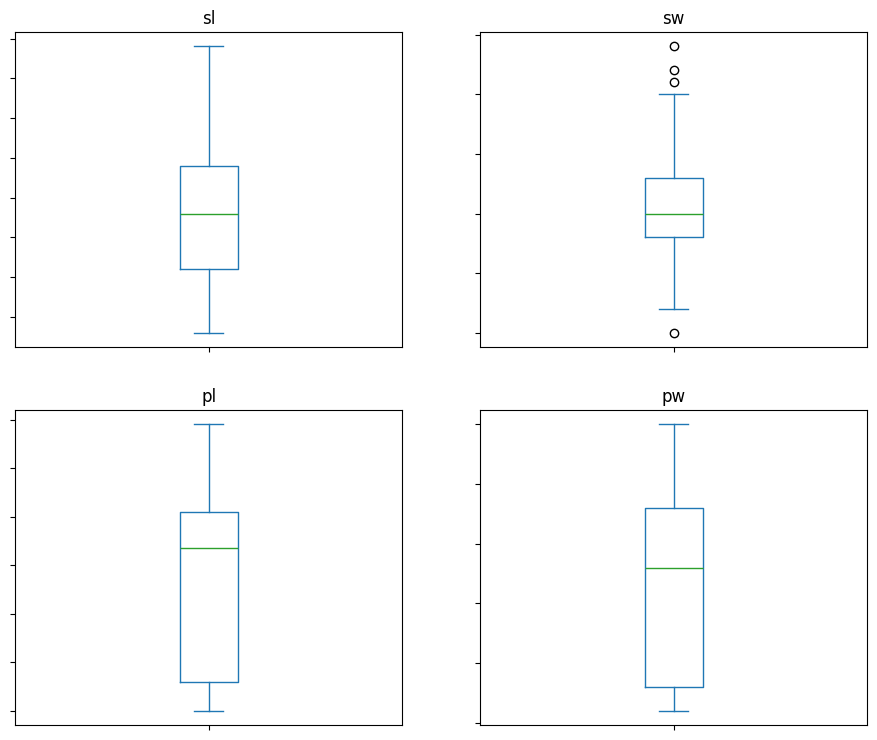

In [22]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        # : axis='both': x축과 y축 둘 다에 대해 설정을 적용합니다.
        # left=True, top=False, right=False, bottom=True: 왼쪽과 아래쪽 틱만 표시하고, 오른쪽과 위쪽 틱은 표시하지 않습니다.
        # labelleft=False, labeltop=False, labelright=False, labelbottom=False: 모든 축 레이블을 표시하지 않습니다.
        plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, 
                        labelleft=False,labeltop=False, labelright=False, labelbottom=False)
        dataset[col].plot(kind='box', subplots=True, sharex=False, sharey=False)
        plt.title(col)
        i += 1
    plt.show()
    
boxplot_iris(df.columns[:-1], df)

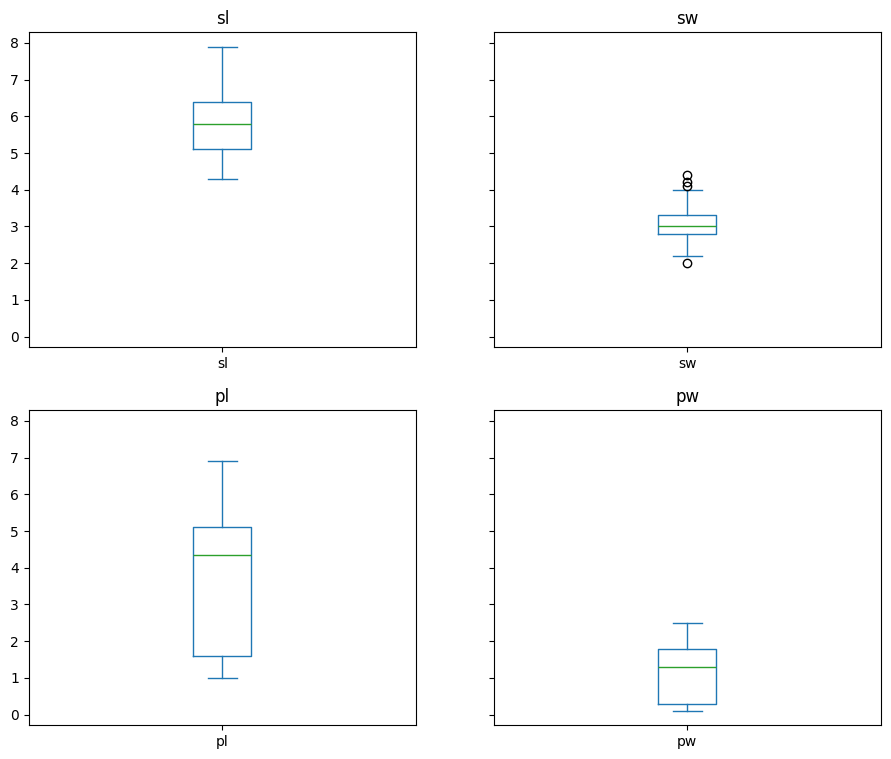

In [23]:
# 변수들의 값의 크기를 다르게 하면 서로 얼마나 차이가 나는 파악하기 어렵움
# 이렇때는 변수값의 각각의 크기를 동일하게 하고 비교하면 파악하기 가 좀 더 쉽다.
## 아래 그림을 보면 sl의 길이는 sw의 길이보다 크고 pw의 너비는 sw의 너비보다 작다는 것을 알수 있다.
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    df.iloc[:, i].plot(kind='box', ax=ax)
    ax.set_title(df.columns[i])
plt.show()

### 히스토그램 그리기
#### 히스토그램은 어떠한 변수에 대해서 구간별 빈도수를 나타낸 그래프다.
#### 직관적으로 분포의 경향을 파악 할 수 있도록 하기 위함

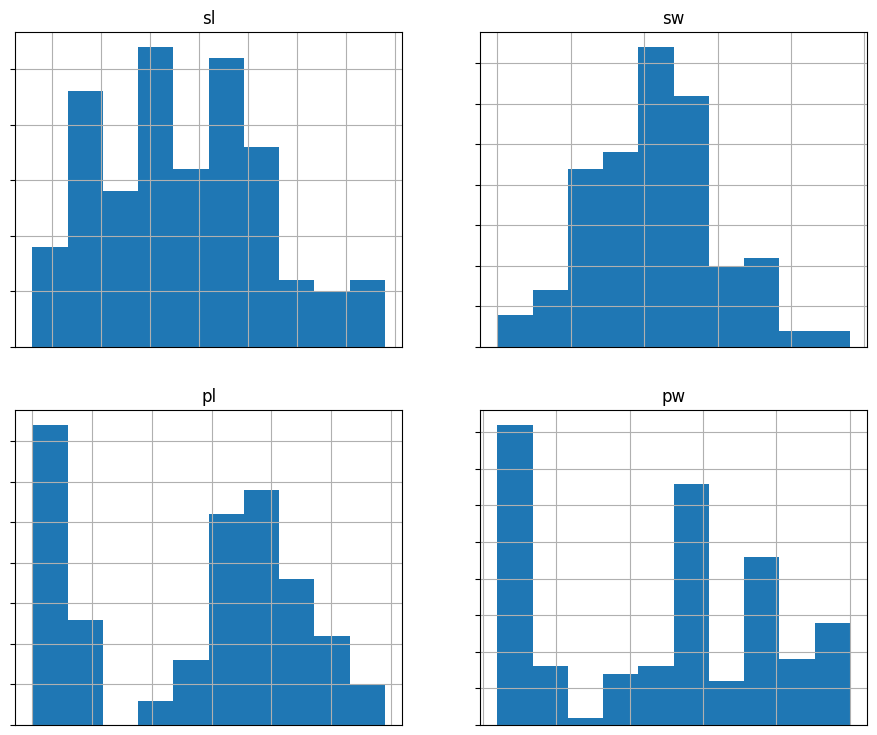

In [27]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True, top=False,
                       right=False, bottom=False, labelleft=False,
                       labeltop=False, labelright=False, labelbottom=False)
        dataset[col].hist()
        plt.title(col)
        i += 1
    plt.show()
    
histogram_iris(df.columns[:-1], df)

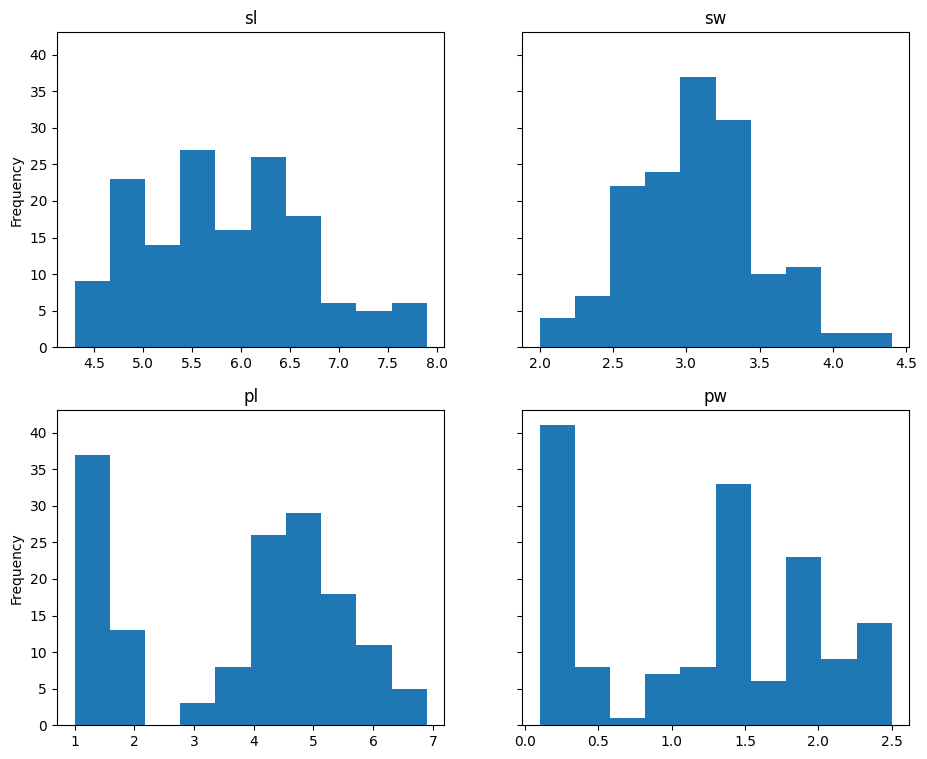

In [28]:
fig, axes = plt.subplots(2,2, figsize=(11, 9), sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    df.iloc[:, i].plot(kind='hist', ax=ax)
    ax.set_title(df.columns[i])
plt.show()

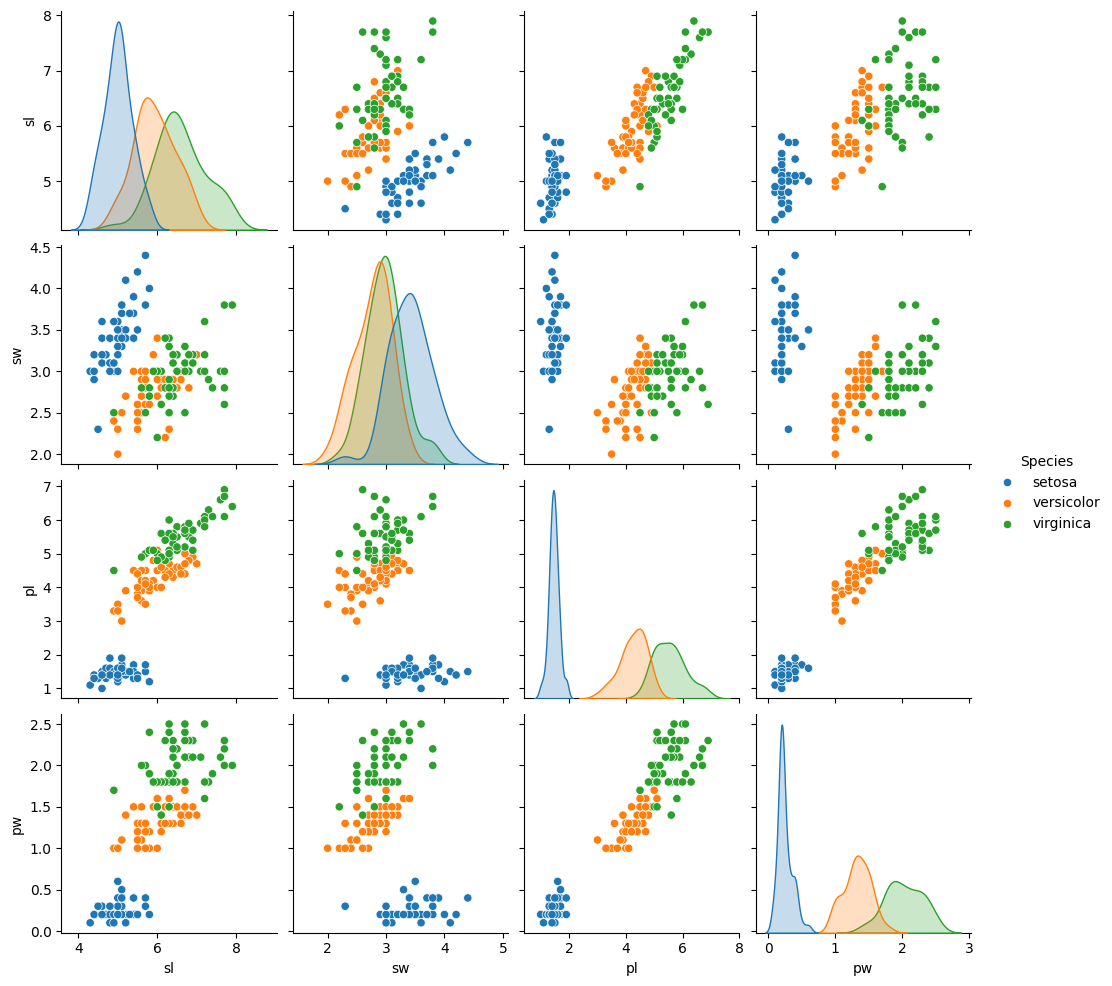

In [29]:
# 산점도
sns.pairplot(df, hue='Species')
plt.show()

### 2.3 데이터 전처리
데이터를 학습과 테스트 테이터로 분리하고, 모든 Features의 Scale이 동등해지도록 RubustScaling을 수행한다.

In [30]:
from sklearn.model_selection import train_test_split
# 전체 데이터의 25%를 테스트 데이터로 할당
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=42
)

In [31]:
# RoubustScaler를 이용해서  데이터의 스케일을 동등하게 맞춰줌
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# 학습데이터의 평균과 스케일 데이터의 평균이다.
# 스케일 데이터의 평균이 좀더 일정한 수준으로 바뀜
X_train.mean(0), X_train_scaled.mean(0)

(array([5.83035714, 3.04017857, 3.80714286, 1.21428571]),
 array([ 0.02335165,  0.08035714, -0.14081633, -0.05714286]))

## 3 모델 학습
### 3.1 base 모델

In [35]:
# LogisticRegression를 이용해서 모델을 생성하고 스케일된 데이터로 학습을 하고 평가를 하면 100%의 분류 정확도를 얻을 수 있음
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

1.0

### 3.2 모델 일반화를 위한 cross-validation(가장 많이 수행하는 평가 방법)
이때, cross_val_score는 hyper-parameter를 선택하는 데 사용하고, 직접적으로 학습된 모델을 변환시키지는 않는다. 따라서 cross_val_score에서 사용된 모델은 한번 더 학습을 시켜야한다. 
#### 1) KFold (랜덤)

In [37]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results =cross_val_score(model, X_train_scaled, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")
    
print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.8695652173913043
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 0.9090909090909091
3번째 교차검증 정확도: 0.9090909090909091
4번째 교차검증 정확도: 0.9090909090909091

교차검증 최종 정확도: 0.9193675889328062


#### StratifiedKFold : y값이 균등하게 접힐 수 있게 하는 방법

In [38]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results =cross_val_score(model, X_train_scaled, y_train, cv=cv)
fin_result = results.mean()

for i, r in enumerate(results):
    print(f"{i}번째 교차검증 정확도: {r}")
    
print(f"\n교차검증 최종 정확도: {fin_result}")

0번째 교차검증 정확도: 0.9565217391304348
1번째 교차검증 정확도: 0.9130434782608695
2번째 교차검증 정확도: 0.8636363636363636
3번째 교차검증 정확도: 0.9090909090909091
4번째 교차검증 정확도: 0.9545454545454546

교차검증 최종 정확도: 0.9193675889328062


[Quiz] 튜닝할 hyper-parameter를 다양하게 조정해서 각 튜닝 모델의 평가 정확도를 진지하게 알아보기 위해 kFold를 적용하여 가장 정확도가 높은 파라미터를 탐색해보자.

In [41]:
best = {}
best['score'] = 0
penalties = ['l1', 'l2']
Cs = [.01, .1, 1, 10, 100]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for p in penalties:
    for c in Cs:
        m = LogisticRegression(penalty=p, C=c, solver='liblinear')  # solver 추가
        results = cross_val_score(m, X_train_scaled, y_train, cv=cv)
        score = results.mean()
        print(f"current val score is {score} at penalty={p}, C={c}")
        if score > best['score']:
            print(f"current best val score is {score} at penalty={p}, C={c}")
            best['score'], best['penalty'], best['C'], best['model'] = score, p, c, m

print(f"\n\n best val score is {best['score']} at penalty={best['penalty']}, C={best['C']}")
m = best['model'].fit(X_train_scaled, y_train)
testScore = best['model'].score(X_test_scaled, y_test)
print(f"real Test score is {testScore}")

current val score is 0.31304347826086953 at penalty=l1, C=0.01
current best val score is 0.31304347826086953 at penalty=l1, C=0.01
current val score is 0.7758893280632411 at penalty=l1, C=0.1
current best val score is 0.7758893280632411 at penalty=l1, C=0.1
current val score is 0.88300395256917 at penalty=l1, C=1
current best val score is 0.88300395256917 at penalty=l1, C=1
current val score is 0.9181818181818182 at penalty=l1, C=10
current best val score is 0.9181818181818182 at penalty=l1, C=10
current val score is 0.9272727272727274 at penalty=l1, C=100
current best val score is 0.9272727272727274 at penalty=l1, C=100
current val score is 0.7849802371541501 at penalty=l2, C=0.01
current val score is 0.7758893280632411 at penalty=l2, C=0.1
current val score is 0.8470355731225296 at penalty=l2, C=1
current val score is 0.8920948616600791 at penalty=l2, C=10
current val score is 0.9094861660079051 at penalty=l2, C=100


 best val score is 0.9272727272727274 at penalty=l1, C=100
real Te